PCA实战task：
1、基于iris_data.csv数据，建立KNN模型实现数据分类（n_neighbors=3）
2、对数据进行标准化处理，选取一个维度可视化处理后的效果
3、进行与原数据等维度PCA，查看各主成分的方差比例
4、保留合适的主成分，可视化降维后的数据
5、基于降维后数据建立KNN模型，与原数据表现进行对比

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
X = data.drop(['target','label'], axis=1)
y = data.loc[:,'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [4]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

y_predict = KNN.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


In [6]:
# PCA 处理
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

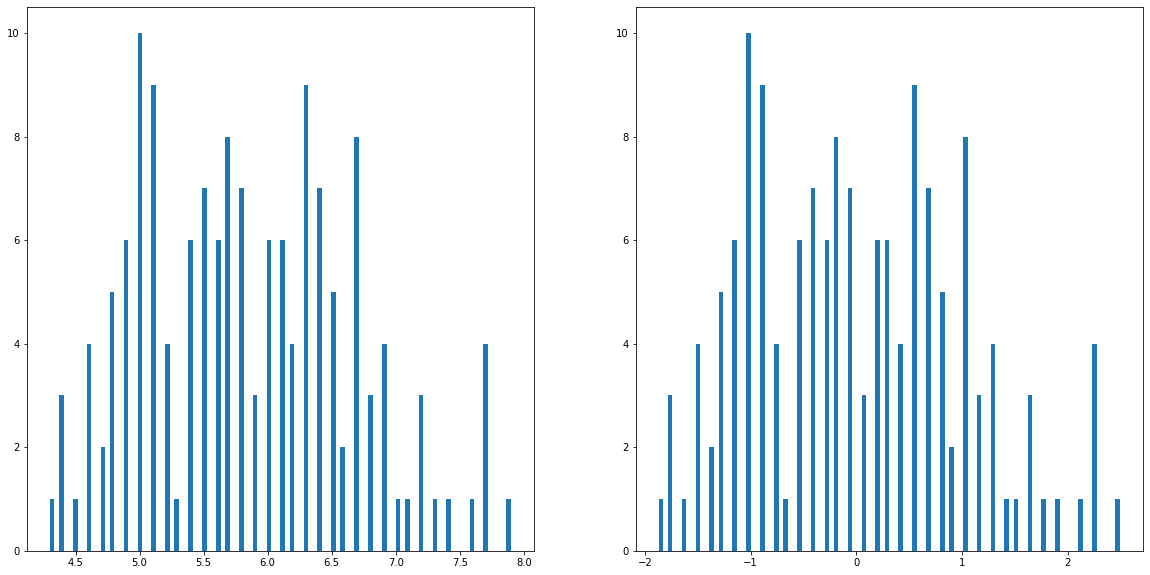

In [9]:
# 对比与标准化，
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(X.loc[:,'sepal length'],bins=100)
plt.subplot(122)
plt.hist(X_norm[:,0],bins=100)
plt.show()

In [10]:
# 原来的均值 和 整理后的均值
x1_mean = X.loc[:,'sepal length'].mean()
x1_norm_mean = X_norm[:,0].mean()
x1_sigma = X.loc[:,'sepal length'].std()
x1_norm_sigma = X_norm[:,0].std()
print(x1_mean,x1_sigma,x1_norm_mean,x1_norm_sigma)

5.843333333333334 0.828066127977863 -4.736951571734001e-16 1.0


In [12]:
# pca analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm)
#calculate the variance ratio of each principle components
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72770452 0.23030523 0.03683832 0.00515193]


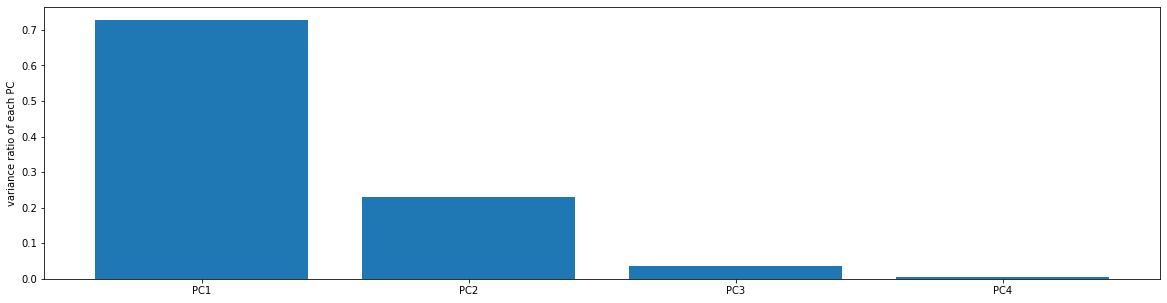

In [13]:
fig2 = plt.figure(figsize=(20,5))
plt.bar([1,2,3,4],var_ratio)
plt.xticks([1,2,3,4],['PC1','PC2','PC3','PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

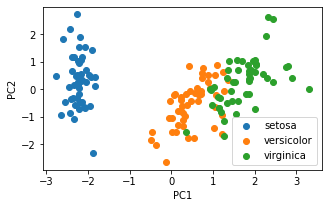

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
print(X_pca)



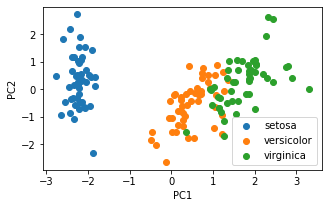

In [16]:
fig3 = plt.figure(figsize=(5,3))
setosa=plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0])
versicolor=plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1])
virginica=plt.scatter(X_pca[:,0][y==2],X_pca[:,1][y==2])
plt.legend((setosa,versicolor,virginica),('setosa','versicolor','virginica'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()